# PHYS 381 - Assignment #4
#### March 5, 2018
John Ming Ngo (30020834)

Kenneth Barry Sharman (00300185)

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Question \#1: Does the numerical solution using Euler's method conserve energy? 

Euler's method is a simple algorithm that can be applied as an approximation to the integration of a differential equations. Consider approximating a first derivative with the following forward difference:
$$y(t_1)'=\dfrac{y(t_1)-y(t_0)}{t_1-t_0}$$
Rearraning this equation for $y(t_1)$:
$$ y(t_1)=y(t_0)+y(t_1)'(t_1-t_0) $$

Extrapolating from initial conditions; $y(t_i)$ can be determined by applying this formula in a recursive manner.

To explore the errors invloved with this approximation, we are tasked with checking the conservation of mechanical energy for an undamped simple harmonic oscillator. We know from our study in Classical Mechanics that the acceleration of a simple harmonic oscillator is equal to the product of the position and square of the angular frequency $\omega$. Since, the angular frequency can be expressed in terms of the spring constant $k$ and the mass $m$ we can establish the following relationship:

$$a = -\dfrac{k}{m}x$$

Using Euler's rule to approximate the velocity and position:
$$ v(t_1) = v(t_0) + a(t_0) * (t_1 - t_0) $$

$$ x(t_1) = x(t_0) + v(t_1) * (t_1 - t_0) $$

We will now define a function that evaluates the position, velocity, and acceleration, for a series of steps from an initial time. We must specify the intial conditions.

In [4]:
def eulerSpringSystem(m = 1.0, k = 1.0, x = 1.0, v = 0.0, dt = 1.0e-2, numPeriods=1.0):
    """
    Code based off code provided by professor, modified for ease of alteration.
    
    Parameters:
        m: The mass connected to the spring. Default is 1.0.
        k: The spring constant. Default is 1.0.
        x: The initial position of the spring. Default is 1.0.
        v: The initial velocity of the spring. Default is 0.
        dt: The size of the timestep. Default is 1.0e-2.
        numPeriods: Time for which values are calculated over.
    Returns:
        np.array(x): A numpy array with the position of the mass on the spring for each time step.
        np.array(v): A numpy array with the velocity of the mass on the spring for each time step.
        np.array(a): A numpy array with the acceleration of the mass on the spring for each time step.
        np.array(t): A numpy array with the time after each time step for the above three.
    """

    #Turn initiaL conditions into list form, to make the iteration step work.
    pos = [x]
    vel = [v]
    accel = [-k/m*x]
    time = [0.0]
    
    # Calculate Period from angular frequency
    T = np.pi*2/np.sqrt(np.abs(k/m))
    # Set the number of iterations to cover 1 specified number of periods
    numIterations = int(numPeriods*T / dt)

    #The iterating forward steps, updating time, acceleration, velocity and position.
    for n in range(numIterations):
        time.append(time[-1]+dt)    # step in time
        accel.append(-k/m*pos[-1])  # calculate acceleration
        vel.append(vel[-1] + accel[-1]*dt) # calculate velocity
        pos.append(pos[-1] + vel[-1]*dt) # calculate displacement

    return np.array(pos), np.array(vel), np.array(accel), np.array(time)

We expect mechanical energy to be conserved. To check if this indeed the case here, there are several options such as a linear fit or the standard deviation.

To get a feel for what is going on we will simply plot a graph of the time versus the energy and see if it's constant. Alternatively we can compare the highest value to the lowest value and see how much of a difference there is.

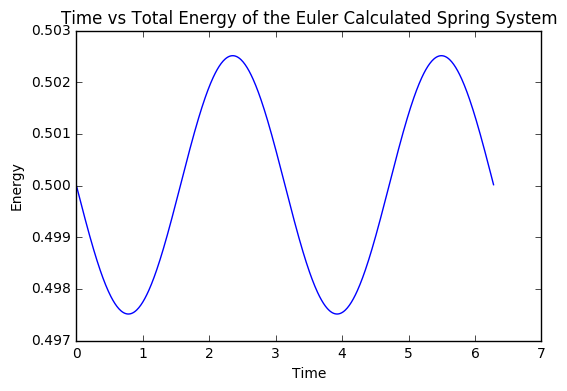

The maximum energy difference is: 0.00500001521386


In [5]:
def plotEnergyTimeGraph(function):
    # Initialize constants and arrays
    m = 1.0
    k = 1.0
    position, velocity, acceleration, time = function()

    # Energy at each time step.
    x, v, a, t = eulerSpringSystem()
    energyValues = 0.5 * m * velocity**2 + 0.5 * k * position**2
    plt.plot(t, energyValues, "b-")
    plt.xlabel("Time")
    plt.ylabel("Energy")
    plt.title("Time vs Total Energy of the Euler Calculated Spring System")
    plt.show()

    maxEnergyDifference = np.max(energyValues) - np.min(energyValues)
    print("The maximum energy difference is:", maxEnergyDifference)
plotEnergyTimeGraph(eulerSpringSystem)

As can be seen from the above graph and the maximum energy difference calculation results, Euler's method as it is currently implemented does not conserve energy. Rather, the total energy seems to fluctuate in a sinusoidal fashion. The maximum energy difference is around 0.005, which is significantly larger than the floating point imprecision ranges, indicating that this isn't primarily due to floating point issues. However, consider that the amount it fluctuates by is roughly 1% of the total energy values, and that it fluctuates around a constant value rather than going all over the place - this indicates that at the very least, the errors in this method for this situation are stable and won't throw the calculations off in the long run. However, if you ever need high precision, perhaps this method as it is currently implemented is not a good idea.

### Is the angular frequency correct?

We will use the times of maximum displacement to determine the period $T$, which can be used to find the angular velocity utilizing the relation:
$$\omega = \dfrac{2\pi}{T}$$

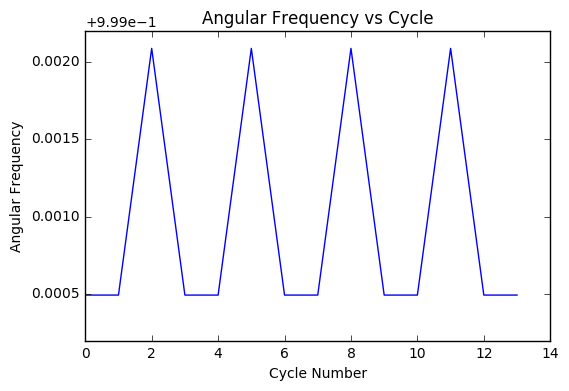

In [53]:
pos, vel, accel, t = eulerSpringSystem(numPeriods=15)

#Find the maximum position.
maxX = np.max(pos)

#Find when the position is at a maximum.
maxTimes = []
for i in range(len(t)):
    if abs(pos[i] - maxX) <= 1e-5:
        maxTimes.append(round(t[i], 3))

#After identifying when the function hits its maximums, sort the list down to only the unique values.
maxTimes = sorted(list(set(maxTimes)))

#Find the corrisponding frequencies; frequency is the period/2pi, period corrisponds to the current max time minus the previous max time.
frequencies = []
for i in range(1, len(maxTimes)):
    frequencies.append((maxTimes[i]-maxTimes[i-1])/(2*np.pi)) 

#Cycle number: Find the cycle the frequency corrisponds to.
cycleNumber = [x for x in range(len(frequencies))]

#Plot frequencies for each cycle
#plt.xlim(10, 100)
plt.ylim(0.9992, 1.0012)
plt.plot(cycleNumber, frequencies, "b-")
plt.xlabel("Cycle Number")
plt.ylabel("Angular Frequency")
plt.title("Angular Frequency vs Cycle")


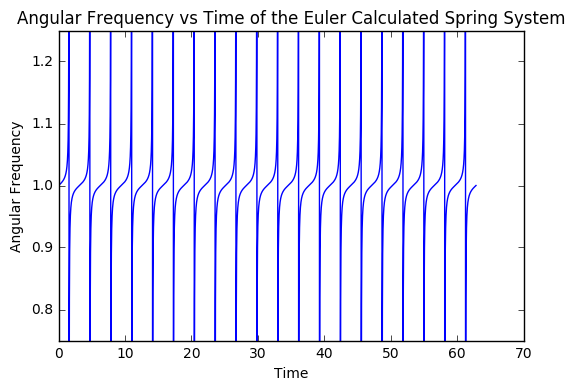

In [52]:
#Much simplier method; -accel/position gives us the angular frequency. 
#Issue is that we run into asymptotic zero division errors, messing with
#our graph.

pos, vel, accel, t = eulerSpringSystem(numPeriods=10)

plt.ylim(0.75, 1.25)
plt.plot(t, -(accel/pos), "b-")
plt.xlabel("Time")
plt.ylabel("Angular Frequency")
plt.title("Angular Frequency vs Time of the Euler Calculated Spring System")


## UPDATE THIS COMMENT to include the frequencies ~2
The desired value for the angular frequency, coming from w = sqrt(k/m) where our k and m are both 1.0, is 1.0. As we can see from both our methods of trying to find angular frequency, euler's method seems to stay around 1.0, but we're running into issues with the methods themselves since due to either asymptotic division issues or the program misidentfying things ##NOT DONE THIS IS CRUDE AS HELL

## Question \#2: how does the peak error in energy depend on time step? 

To determine the peak error in energy we need a reference point. This can be obtained by evaluating the initial energy, $E_0$, from the initial conditions. 

In [6]:
def initialEnergy(m = 1.0, k = 1.0, x = 1.0, v = 0.0):
    return 0.5*m*vel[0]**2 + 0.5*k*pos[0]**2

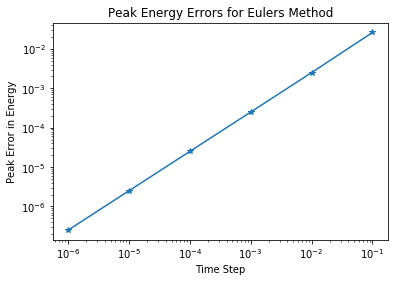

In [7]:
peakE1 = []
deltaList = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

for delta in deltaList:
    x, v, a, t = eulerSpringSystem(dt=delta)
    E = 0.5*m*v**2 + 0.5*k*x**2
    peakE1.append( np.max( np.abs(E-initialEnergy()) ))
    
plt.title('Peak Energy Errors for Eulers Method')
plt.ylabel('Peak Error in Energy')
plt.xlabel('Time Step')
plt.xscale('log') 
plt.yscale('log')
plt.plot(deltaList, peakE1, '*-') 

As we can see from the graph; as the time step size increses, the error in the fluctuation increases, and vice versa. It would seem to be the case that as the step size approaches an infintessimally small value that the error will also approach an infintessimally small value - perhaps as small as the floating point errors. However, reaching that level will also require progressively more iterations to generate data for the same amount of time, and thus eventually becomes prohibitively computationally expensive.

### Question \#3: What happens to the peak error if we step using the old velocities?
Modifying Euler's method to utilize the velocity froom the previous time step, we arrive at the following expression:
$$ x(t_1) = x(t_0) + v(t_1) * (t_1 - t_0) $$
$$ v(t_1) = v(t_0) + a(t_1) * (t_1 - t_0) $$

We will perform a similar anaylsis, and compare the peak error to those previous determined using the new velocity.


In [8]:
def eulerSpringSystemOldVelocities(m = 1.0, k = 1.0, x = 1.0, v = 0.0, dt = 1.0e-2, numPeriods=1.0):
    """
    Code based off code provided by professor, modified for ease of alteration.
    
    Parameters:
        m: The mass connected to the spring. Default is 1.0.
        k: The spring constant. Default is 1.0.
        x: The initial position of the spring. Default is 1.0.
        v: The initial velocity of the spring. Default is 0.
        dt: The size of the timestep. Default is 1.0e-2.
        numPeriods: Time for which values are calculated over.
    Returns:
        np.array(x): A numpy array with the position of the mass on the spring for each time step.
        np.array(v): A numpy array with the velocity of the mass on the spring for each time step.
        np.array(a): A numpy array with the acceleration of the mass on the spring for each time step.
        np.array(t): A numpy array with the time after each time step for the above three.
    """

    #Turn initiaL conditions into list form, to make the iteration step work.
    pos = [x]
    vel = [v]
    accel = [-k/m*x]
    time = [0.0]
    
    # Calculate Period from angular frequency
    T = np.pi*2/np.sqrt(np.abs(k/m))
    # Set the number of iterations to cover 1 specified number of periods
    numIterations = int(numPeriods*T / dt)

    #The iterating forward steps, updating time, acceleration, velocity and position.
    for n in range(numIterations):
        time.append(time[-1]+dt)    # step in time
        accel.append(-k/m*pos[-1])  # calculate acceleration
        vel.append(vel[-1] + accel[-1]*dt) # calculate velocity
        pos.append(pos[-1] + vel[-2]*dt) # calculate displacement
        
    return np.array(pos), np.array(vel), np.array(accel), np.array(time)

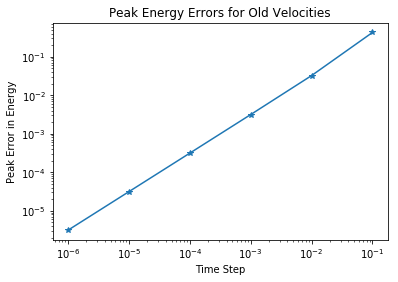

In [9]:
peakE2 = []
deltaList = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
for delta in deltaList:
    x, v, a, t = eulerSpringSystemOldVelocities(dt=delta,)
    E = 0.5*m*v**2 + 0.5*k*x**2
    peakE2.append( np.max( np.abs(E-initialEnergy(m, k)) ))
    
plt.title('Peak Energy Errors for Old Velocities')
plt.ylabel('Peak Error in Energy')
plt.xlabel('Time Step')
plt.xscale('log') 
plt.yscale('log')
plt.plot(deltaList, peakE2, '*-') 

## More comments
It appears as though the peak errors in energy are roughly an order of magnitude larger than those evaluated using the new velocity.

## Question \#4: What happens to the peak error if we step using the average of old and new velocities?
$$ x(t_1) = x(t_0) + \frac{1}{2}[ v(t_0) + v(t_1) ] * (t_1 - t_0) $$

In [10]:
def eulerSpringSystemOldAndNewVelocities(m = 1.0, k = 1.0, x = 1.0, v = 0.0, dt = 1.0e-2, numPeriods=1.0):
    """
    Code based off code provided by professor, modified for ease of alteration.
    
    Parameters:
        m: The mass connected to the spring. Default is 1.0.
        k: The spring constant. Default is 1.0.
        x: The initial position of the spring. Default is 1.0.
        v: The initial velocity of the spring. Default is 0.
        dt: The size of the timestep. Default is 1.0e-2.
        numPeriods: Time for which values are calculated over.
    Returns:
        np.array(x): A numpy array with the position of the mass on the spring for each time step.
        np.array(v): A numpy array with the velocity of the mass on the spring for each time step.
        np.array(a): A numpy array with the acceleration of the mass on the spring for each time step.
        np.array(t): A numpy array with the time after each time step for the above three.
    """

    #Turn initiaL conditions into list form, to make the iteration step work.
    pos = [x]
    vel = [v]
    accel = [-k/m*x]
    time = [0.0]
    
    # Calculate Period from angular frequency
    T = np.pi*2/np.sqrt(np.abs(k/m))
    # Set the number of iterations to cover 1 specified number of periods
    numIterations = int(numPeriods*T / dt)

    #The iterating forward steps, updating time, acceleration, velocity and position.
    for n in range(numIterations):
        time.append(time[-1]+dt)    # step in time
        accel.append(-k/m*pos[-1])  # calculate acceleration
        vel.append(vel[-1] + accel[-1]*dt) # calculate velocity
        pos.append(pos[-1] + 0.5*(vel[-1]+vel[-2])*dt) # calculate displacement

    return np.array(pos), np.array(vel), np.array(accel), np.array(time)


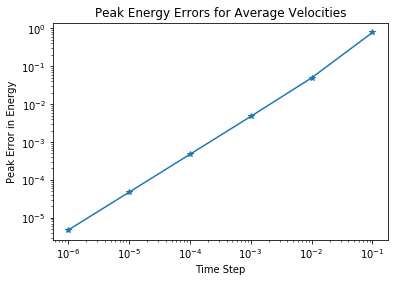

In [11]:
peakE3 = []
deltaList = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
for delta in deltaList:
    x, v, a, t = eulerSpringSystemOldAndNewVelocities(dt=delta, numPeriods=3)
    E = 0.5*m*v**2 + 0.5*k*x**2
    peakE3.append( np.max( np.abs(E-initialEnergy(m, k)) ))
    
plt.title('Peak Energy Errors for Average Velocities')
plt.ylabel('Peak Error in Energy')
plt.xlabel('Time Step')
plt.xscale('log') 
plt.yscale('log')
plt.plot(deltaList, peakE3, '*-') 

Using the avergae velocity; the peak errors in energy are of the same order of magnitude as the old velocity method. To get a clearer picture of the three methods, we will plot all three errors on the same graph.

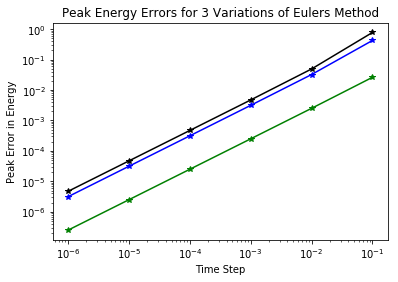

In [12]:
plt.title('Peak Energy Errors for 3 Variations of Eulers Method')
plt.ylabel('Peak Error in Energy')
plt.xlabel('Time Step')
plt.xscale('log') 
plt.yscale('log')
plt.plot(deltaList, peakE1, 'g*-')
plt.plot(deltaList, peakE2, 'b*-')
plt.plot(deltaList, peakE3, 'k*-')

### Comment on 3 plots

### Conclusion (THESE ARE JUST RANDOM NOTES AT THE MOMENT)
Error is always a concern when integrating differential equations because derivatives require small differences and small differences are prone to subtractive cancelations and round off accumulation. In addition, because our stepping procedure for solving the differential equation is a continuous extrapolation of the initial conditions with each step building on a previous extrapolation, it is like a castile built on sand.
It is simplest if the time steps used throughout the integration remain constant in size, however that is not a requirement. In fact; to make the algorithm better we may consider adapting the step size by making h larger in regions where y varies slowly (speeds up integration and cuts down on the round-off error) and making h smaller in regions where y varies rapidly.

This is clearly a simple algorithm that requires very small h values to obtain precision. Yet using small values for h increases the number of steps and the accumulation of the round-off error, which may lead to instability. Instability is often a problem when you integrate a y(t) that decreases as the integration proceeds. If you have a linear ODE, you are best off integrating inward from large times to small times and then scaling the answer to agree with the initial conditions.
Not recommended for general use- it is commonly used to start off a more precise algorithm.
